<a href="https://colab.research.google.com/github/AishwaryaKaranth/final-year-project/blob/adhishreya/unprocessed_proj_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -o /content/drive/MyDrive/Rotation.zip

# Libraries

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.callbacks import EarlyStopping
from keras.layers import Input
from keras.models import load_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from sklearn.model_selection import train_test_split

# generating extra data pints in excel

In [ ]:
# data=pd.read_csv('/content/training_solutions_rev1.csv')
# size=data.shape[0]
# columns=data.columns
# size

In [ ]:
# data['GalaxyID']=data['GalaxyID'].astype('str')

In [ ]:
# with open('modified.csv','w') as f1:
#     writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
#     writer.writerow(columns.values)
#     result=[]
#     for i in range(0,size):
#         d=data.iloc[i]
#         p=d[0]
#         for j in range(1,5):
#             name=p+'resized'+str(j)+'rotated'
#             d.values[0]=name
#             writer.writerow(d)

In [ ]:
# data=pd.read_csv('modified.csv')
# size=data.shape[0]
# columns=data.columns
# size

In [ ]:
# data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008resized1rotated,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.00000,0.0,0.092886,0.0,0.0,0.0,0.325512
1,100008resized2rotated,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.00000,0.0,0.092886,0.0,0.0,0.0,0.325512
2,100008resized3rotated,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.00000,0.0,0.092886,0.0,0.0,0.0,0.325512
3,100008resized4rotated,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.00000,0.0,0.092886,0.0,0.0,0.0,0.325512
4,100023resized1rotated,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.0,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.45995,0.0,0.591328,0.0,0.0,0.0,0.000000


In [ ]:
# shuf=data.sample(frac=1)
# with open('unprocessed.csv','w') as f1:
#     writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
#     writer.writerow(columns.values)
#     writer.writerows(shuf.values) 
# val=len(shuf)
# val

246312

In [ ]:
# shuf.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
233037,951320resized2rotated,0.852225,0.144623,0.003152,0.000000,0.144623,0.000000,0.144623,0.000000,0.144623,0.0,0.144623,0.000000,0.000000,0.000000,1.000000,0.606114,0.246111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
170449,721954resized2rotated,0.835000,0.141000,0.024000,0.046953,0.094047,0.000000,0.094047,0.000000,0.094047,0.0,0.070535,0.023512,0.000000,0.324000,0.676000,0.001670,0.621240,0.212090,0.001944,0.081000,0.023976,0.0,0.120528,0.096552,0.000000,0.046953,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
238017,968893resized2rotated,0.107345,0.892655,0.000000,0.622711,0.269944,0.064103,0.205842,0.215602,0.054342,0.0,0.269944,0.000000,0.000000,0.172388,0.827612,0.000000,0.000000,0.107345,0.000000,0.000000,0.000000,0.0,0.043097,0.043097,0.086194,0.244725,0.041099,0.336887,0.215602,0.00000,0.0,0.0,0.065135,0.0,0.0,0.0,0.150467
193744,805563resized1rotated,0.862111,0.137889,0.000000,0.000000,0.137889,0.000000,0.137889,0.000000,0.137889,0.0,0.045640,0.037330,0.054919,0.146929,0.853071,0.119685,0.742426,0.000000,0.000000,0.029386,0.000000,0.0,0.088157,0.029386,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
71482,363175resized3rotated,0.238665,0.723998,0.037337,0.034625,0.689373,0.062990,0.626383,0.311351,0.378022,0.0,0.209596,0.295701,0.184076,0.197081,0.802919,0.000000,0.224810,0.013855,0.095595,0.000000,0.000000,0.0,0.054525,0.046961,0.000000,0.034625,0.000000,0.000000,0.177672,0.13368,0.0,0.0,0.103455,0.0,0.0,0.0,0.207896


# Model architecture

In [ ]:
def ConvLayers(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3,3,activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1),padding="same"))

In [ ]:
def FCLayers(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In [ ]:
def VGG16_arc():
    model=Sequential()
    ConvLayers(2,model,64)
    ConvLayers(2,model,128)
    ConvLayers(3,model,256)
    ConvLayers(3,model,512)
    ConvLayers(3,model,512)
    model.add(Flatten())
    FCLayers(model)
    FCLayers(model)
    model.add(Dense(37,activation='sigmoid'))
    #model.add(Dense(3,activation='softmax'))
    return model

In [ ]:
#Model compilation
optimizer = RMSprop(lr=1e-4) #can be later tweaked
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
shuf=pd.read_csv('/content/drive/MyDrive/unprocessed.csv')
shuf.head()
cols=shuf.columns[1:]

In [ ]:
shuf.shape

(246312, 38)

In [ ]:
X=shuf['GalaxyID'].values.tolist()
Y=shuf[cols].values.tolist()
# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
path='/content/Rotation/'
sam=len(y_train)

# Generator Function

In [ ]:
def Generate_train(x_train,y_train,bs):
    while(True):
        b_start=0
        b_end=bs
        L=len(y_train)
        while b_start<L:            
            limit=min(b_end,L)
            x_samp=x_train[b_start:limit]
            y_samp=y_train[b_start:limit]
            X_train=[]
            Y_train=[]
            for i in range(0,len(x_samp)):
#                 print(i)
                X_train.append(cv2.cvtColor(cv2.imread(path+str(x_samp[i])+'.jpg') ,cv2.COLOR_BGR2RGB))
                Y_train.append(y_samp[i])
            X_train=np.array(X_train)
            Y_train=np.array(Y_train)
            yield X_train,Y_train
            b_start+=bs
            b_end+=bs         

In [ ]:
batch_size=32
train_gen=Generate_train(x_train,y_train,batch_size)

In [ ]:
optimizer = RMSprop(lr=1e-4) #can be later tweaked
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 
steps=len(x_train)//batch_size

In [ ]:
def Generate_test(x_test,y_test,bs):
    while(True):
        b_start=0
        b_end=bs
        L=len(y_test)
        while b_start<L:            
            limit=min(b_end,L)
            x_samp=x_test[b_start:limit]
            y_samp=y_test[b_start:limit]
            X_test=[]
            Y_test=[]
            for i in range(0,len(x_samp)):
#                 print(i)
                X_test.append(cv2.cvtColor(cv2.imread(path+str(x_samp[i])+'.jpg') ,cv2.COLOR_BGR2RGB))
                Y_test.append(y_samp[i])
            X_test=np.array(X_test)
            Y_test=np.array(Y_test)
            yield X_test,Y_test
            b_start+=bs

            b_end+=bs         

In [ ]:
# stop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3)
stop=EarlyStopping(monitor='val_loss',verbose=1,min_delta=0,patience=5)
batch_size=32
test_gen=Generate_test(x_test,y_test,batch_size)
val_steps=len(x_test)//batch_size

In [ ]:
model.build(input_shape=(None,224,224,3))

checkpoint_filepath = 'weight.hdf5'
cp_callback =keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)

model.fit(train_gen,epochs=50,verbose=1,batch_size=None,steps_per_epoch=steps,callbacks=[cp_callback],validation_data=test_gen,validation_steps=val_steps)
# model.fit(x=img_train, y=y_train, batch_size = 32, epochs = 50)

Epoch 1/50
6157/6157 [==============================] - 255s 39ms/step - loss: 0.0240 - accuracy: 0.6225 - val_loss: 0.0154 - val_accuracy: 0.6836
Epoch 2/50
6157/6157 [==============================] - 235s 38ms/step - loss: 0.0154 - accuracy: 0.6856 - val_loss: 0.0151 - val_accuracy: 0.6849
Epoch 3/50
6157/6157 [==============================] - 237s 38ms/step - loss: 0.0140 - accuracy: 0.7103 - val_loss: 0.0130 - val_accuracy: 0.7313
Epoch 4/50
6157/6157 [==============================] - 237s 39ms/step - loss: 0.0126 - accuracy: 0.7329 - val_loss: 0.0139 - val_accuracy: 0.7070
Epoch 5/50
6157/6157 [==============================] - 235s 38ms/step - loss: 0.0119 - accuracy: 0.7441 - val_loss: 0.0119 - val_accuracy: 0.7530
Epoch 6/50
6157/6157 [==============================] - 236s 38ms/step - loss: 0.0113 - accuracy: 0.7533 - val_loss: 0.0114 - val_accuracy: 0.7560
Epoch 7/50
6157/6157 [==============================] - 236s 38ms/step - loss: 0.0107 - accuracy: 0.7594 - val_loss: 0

In [ ]:
model.save('unpros_trial.hdf5')

In [ ]:
key=model.history.history.keys()
values=model.history.history

In [ ]:
key

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

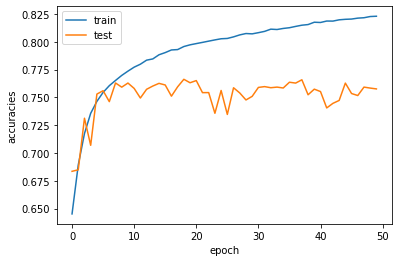

In [ ]:
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.legend(['train', 'test'], loc='upper left')

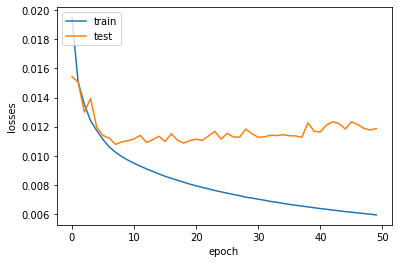

In [ ]:
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train', 'test'], loc='upper left')